In [53]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
audio_data = 'Speach.mp3'
y, sr = librosa.load(audio_data)

Функция load считывает аудио-файл в виде временного рядя. Где, sr обозначает sample_rate.

Time series (временной ряд) представлен массивом.
sample_rate — это количество сэмплов на секунду аудио.
По умолчанию звук микшируется в моно. Но его можно передискретизировать во время загрузки до 22050 Гц. Это делается с помощью дополнительных параметров в функции librosa.load

In [55]:
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(59064,) 22050


С помощью IPython.display можно проигрывать аудио в Jupyter Notebook, а с помощью display.waveshow формируются звуковые волны и мы можем посмотреть, как выглядит звук:

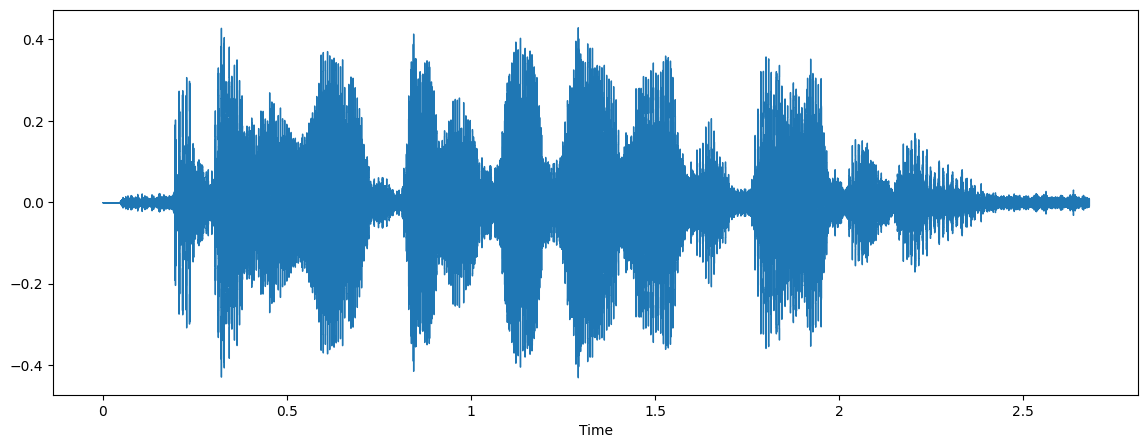

In [56]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

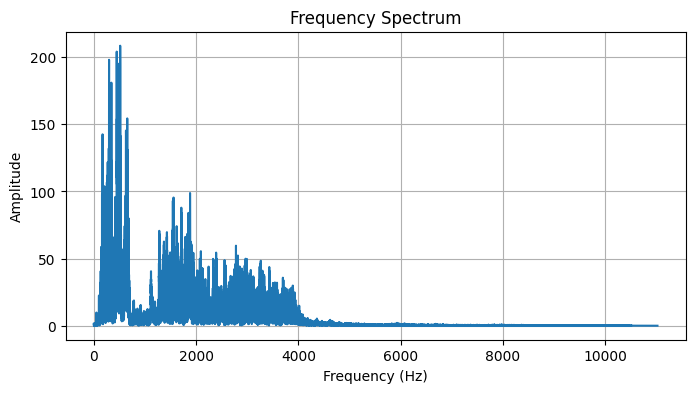

In [57]:
# Compute the FFT of the waveform
from scipy.fft import fft
spectrum = fft(y)
 
# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sr)
 
# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Harmonic + Percussive')

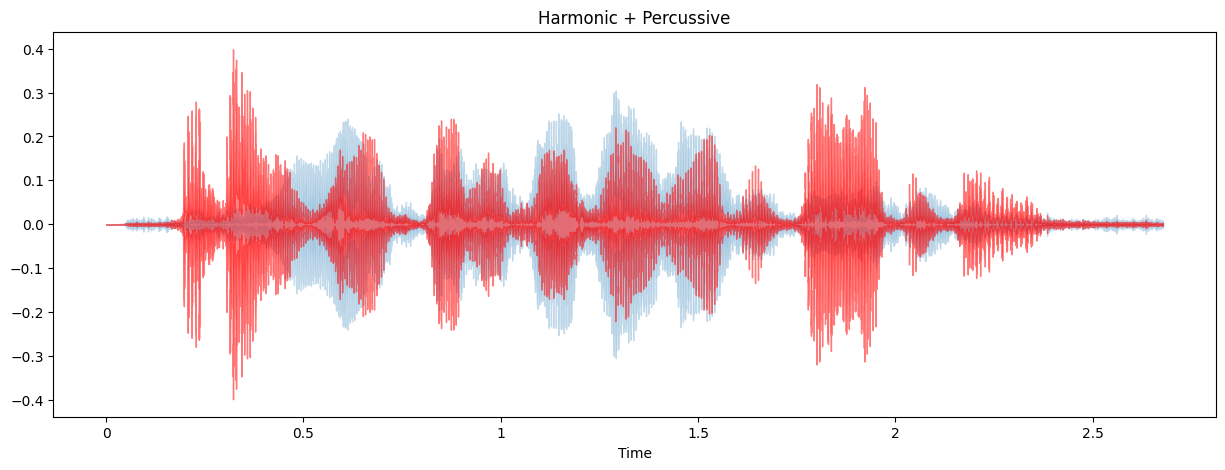

In [58]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Извлечение признаков из аудиофайла
У сэмпла есть несколько важных признаков. Есть фундаментальное понятие ритма в некоторых формах, а остальные либо имеют свою нюансы, либо связаны:

Темп: скорость, с которой паттерны повторяются. Темп измеряется в битах в минуту (BPM). Если у музыки 120 BPM, это значит, что каждую минуту в ней 120 битов (ударов).
Бит: отрезок времени. Это ритм, выстукиваемый в песне. Так, в одном такте 4 бита, например.
Такт: логичное деление битов. Обычно в такте 3 или 4 бита, хотя возможны и другие варианты.
Интервал: в программах для редактирования чаще всего встречаются интервалы. Обычно есть последовательность нот, например, 8 шестнадцатых одинаковой длины. Обычно интервал — 8 нот, триплеты или четверные.
Ритм: список музыкальных звуков. Все ноты и являются ритмом.

Detected Tempo: [117.45383523] beats/min
[1 2 3 4]


C:\Users\Alex\AppData\Local\Temp\ipykernel_17324\1911874892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=beat_nums, y=beat_time_diff,  palette="BuGn_d",ax=ax)


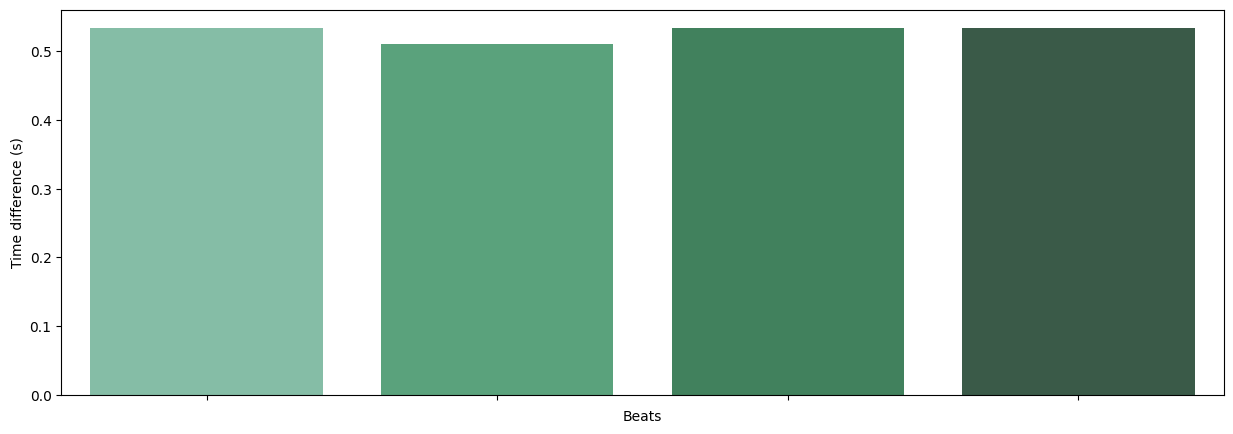

In [59]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x=beat_nums, y=beat_time_diff,  palette="BuGn_d",ax=ax)
#TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given
#Функция принимает 0-1 позиционных аргументов, а у нас их 2, нужно просто поменять позиционные на именованные (x=..., y=...)
g=g.set(xticklabels=[])

Мел-кепстральные коэффициенты (MFCC)

Text(0.5, 1.0, 'MFCC')

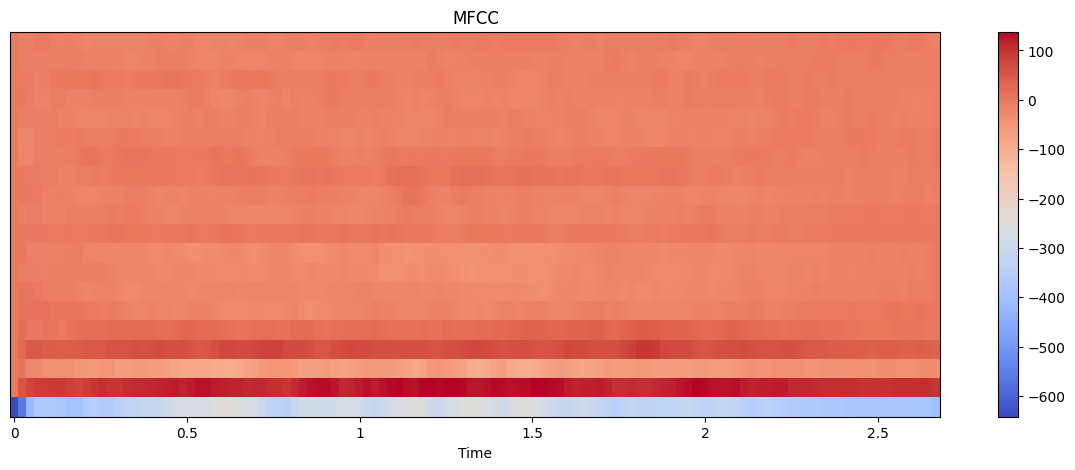

In [60]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [61]:
mfccs

array([[-642.11847  , -560.16406  , -421.77832  , ..., -385.66858  ,
        -387.5615   , -404.45087  ],
       [   0.       ,   54.01008  ,   79.36162  , ...,  105.04031  ,
         105.01001  ,   96.09332  ],
       [   0.       ,    5.4821615,  -25.034348 , ...,  -33.55171  ,
         -32.02575  ,  -33.225037 ],
       ...,
       [   0.       ,   -2.295188 ,   -8.068228 , ...,  -10.124816 ,
          -7.3066382,   -9.1889105],
       [   0.       ,   -7.9563065,   -7.2838573, ...,   -7.0644693,
          -7.9680147,   -9.014017 ],
       [   0.       ,   -8.482904 ,   -8.690062 , ...,   -5.083077 ,
          -9.840828 ,  -11.660761 ]], dtype=float32)

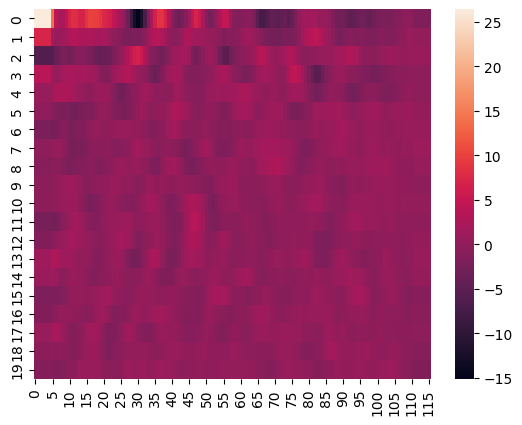

In [62]:
mfcc_delta = librosa.feature.delta(mfccs)
sns.heatmap(mfcc_delta)
plt.show()

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=923
  warnings.warn(


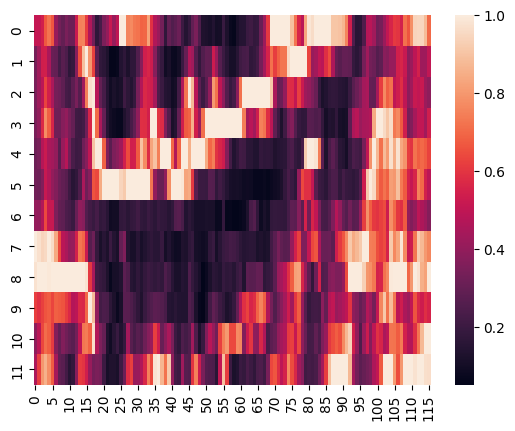

In [63]:
# нормализация в хромограмму
chromagram = librosa.feature.chroma_cqt(y=y, sr=sr)
sns.heatmap(chromagram)
plt.show()

Спектрограмма

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, 
присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование 
Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

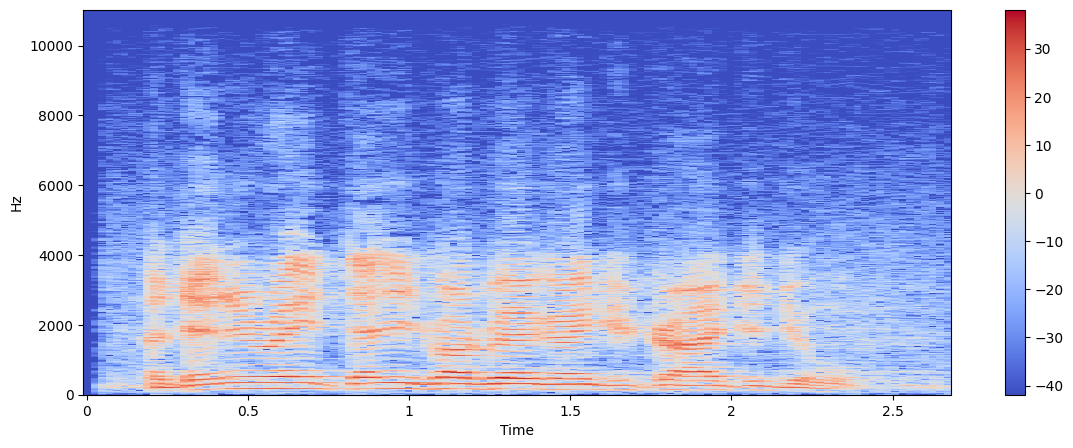

In [64]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Спектральный центроид - Spectral Centroid.

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. 
librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

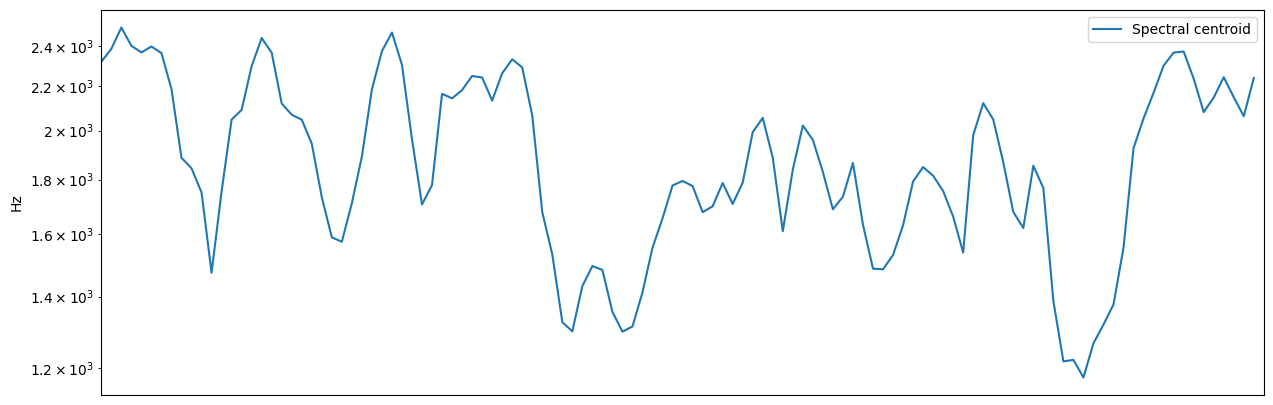

In [65]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

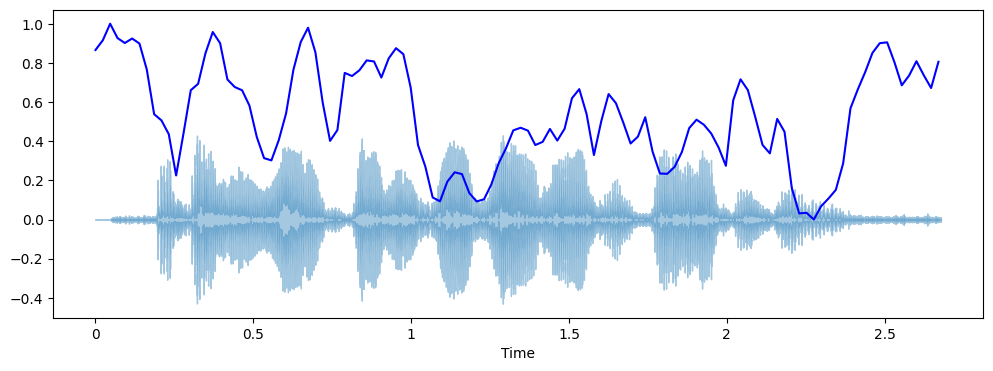

In [66]:
import sklearn
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Гармоническая часть сигнала:
    Это компонент звука, который представляет собой основную тональность и гармонии. Она состоит из основной частоты (фундамента) и ее гармоник — частот, которые являются целыми кратными основной частоты. Гармоническая часть отвечает за музыкальный тон и тембр инструмента или голоса.

Перкуссионная часть сигнала:
    Это компонент звука, который связан с ударными элементами и кратковременными изменениями в амплитуде сигнала. Перкуссионные звуки часто имеют резкие атаки и быстро затухают, что делает их менее предсказуемыми по сравнению с гармоническими звуками.

Зачем нужны эти компоненты?

    1)Анализ звука: Разделение звукового сигнала на гармоническую и перкуссионную части позволяет лучше понять его структуру и характеристики. Это полезно в акустическом анализе, музыкальной теории и звукорежиссуре.
    2)Синтез звука: Знание о гармонических и перкуссионных компонентах помогает в создании и обработке звуков. Например, в синтезаторах можно отдельно управлять гармоническими и перкуссионными элементами для создания более сложных и выразительных звуков.
    3)Обработка и микширование: В процессе записи и микширования музыки понимание этих частей помогает добиться лучшего баланса и звучания, позволяя выделить определенные элементы в миксе.